In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [9]:
logflist = os.listdir("log")
# klist = ['1MPI_8OMP', '2MPI_4OMP','4MPI_2OMP','8MPI_1OMP']
klist = ['4MPI_8OMP', '8MPI_4OMP','16MPI_2OMP','32MPI_1OMP']
dummp = 'Sustained BandWidth (GB/s)'

In [10]:
tmpflist = []
for x in logflist:
    if x.startswith('NEW1_4VE_4800_19200_150_'):
        tmpflist.append(x)
print(tmpflist)

['NEW1_4VE_4800_19200_150_4MPI_8OMP.a2_20B.676597.log', 'NEW1_4VE_4800_19200_150_8MPI_4OMP.a2_20B.676596.log', 'NEW1_4VE_4800_19200_150_16MPI_2OMP.a2_20B.676595.log', 'NEW1_4VE_4800_19200_150_32MPI_1OMP.a2_20B.676594.log']


In [14]:
datamap = {}
for idx,x in enumerate(tmpflist):
    k = klist[idx]
    assert(k in x)
    print(k, x)
    datamap[k] = {}
    f= open('log/'+x, 'r')
    while 1:
        line = f.readline()
        if not line:
            break
        if line.startswith('Time'):
            timedata = f.readline().split(' ')
            timedata = [float(x) for x in timedata]
        if line.startswith("BW"):
            bddata = f.readline().split(' ')
            bddata = [float(x) for x in bddata]
    datamap[k]['Time'] = np.average(np.array(timedata))
    datamap[k]['Bandwidth'] = np.average(np.array(bddata))
print(datamap)   

4MPI_8OMP NEW1_4VE_4800_19200_150_4MPI_8OMP.a2_20B.676597.log
8MPI_4OMP NEW1_4VE_4800_19200_150_8MPI_4OMP.a2_20B.676596.log
16MPI_2OMP NEW1_4VE_4800_19200_150_16MPI_2OMP.a2_20B.676595.log
32MPI_1OMP NEW1_4VE_4800_19200_150_32MPI_1OMP.a2_20B.676594.log
{'4MPI_8OMP': {'Time': 9.786953800000003e-05, 'Bandwidth': 1888.3004}, '8MPI_4OMP': {'Time': 8.8244266e-05, 'Bandwidth': 2093.9758}, '16MPI_2OMP': {'Time': 9.043316999999999e-05, 'Bandwidth': 2042.5756}, '32MPI_1OMP': {'Time': 9.1371762e-05, 'Bandwidth': 2021.8044}}


In [8]:
datamap.keys()

dict_keys(['4MPI_8OMP', '8MPI_4OMP', '16MPI_2OMP', '32MPI_1OMP'])

In [16]:
tmpflist = []
for x in logflist:
    if x.startswith('NEW1_4VE_4800_19200_300_'):
        tmpflist.append(x)
datamap_300 = {}
for idx,x in enumerate(tmpflist):
    for k in klist:
        if k in x:
            break
    assert(k in x)
    print(k,x)
    datamap_300[k] = {}
    f= open('log/'+x, 'r')
    while 1:
        line = f.readline()
        if not line:
            break
        if line.startswith('Time'):
            timedata = f.readline().split(' ')
            timedata = [float(x) for x in timedata]
        if line.startswith("BW"):
            bddata = f.readline().split(' ')
            bddata = [float(x) for x in bddata]
    datamap_300[k]['Time'] = np.average(np.array(timedata))
    datamap_300[k]['Bandwidth'] = np.average(np.array(bddata))

32MPI_1OMP NEW1_4VE_4800_19200_300_32MPI_1OMP.a2_20B.676575.log
8MPI_4OMP NEW1_4VE_4800_19200_300_8MPI_4OMP.a2_20B.676577.log
16MPI_2OMP NEW1_4VE_4800_19200_300_16MPI_2OMP.a2_20B.676576.log
4MPI_8OMP NEW1_4VE_4800_19200_300_4MPI_8OMP.a2_20B.676578.log


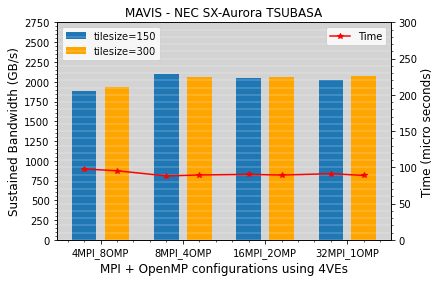

In [20]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.0001)
xpos = [0,1,2,3]
xticks = klist
rects = []
for idx,k in enumerate(klist):
    if idx == 0:
        rect = ax.bar(xpos[idx]-0.2,height=datamap[k]['Bandwidth'],color='#1f77b4',label='tilesize=150',width=0.3)
        rect = ax.bar(xpos[idx]+0.2,height=datamap_300[k]['Bandwidth'],color='orange',label='tilesize=300',width=0.3)        
    else:
        rect = ax.bar(xpos[idx]-0.2,height=datamap[k]['Bandwidth'],color='#1f77b4',width=0.3)
        rect = ax.bar(xpos[idx]+0.2,height=datamap_300[k]['Bandwidth'],color='orange',width=0.3)
    rects.append(rect)
plt.xlabel("MPI + OpenMP configurations using 4VEs",fontsize=12)
plt.ylabel("Sustained Bandwidth (GB/s)",fontsize=12)
plt.yticks(np.arange(0, 3000, 250))
plt.legend(loc='upper left')
plt.minorticks_on()
plt.xticks(xpos,xticks)
ax2 = ax.twinx()
time_pos = []
time_data = []
for i in range(len(xpos)):
    time_pos.append(xpos[i]-0.2)
    time_pos.append(xpos[i]+0.2)
    time_data.append(datamap[klist[i]]['Time'])
    time_data.append(datamap_300[klist[i]]['Time'])
ax2.set_ylim([0,300])
plt.minorticks_on()
# ax2.ticklabel_format(axis='y',scilimits=(4,-4),style='sci')
ax2.set_ylabel("Time (micro seconds)",fontsize=12)
ax2.plot(time_pos, np.array(time_data)*1000000,color='red',marker='*',label='Time')
plt.legend(loc='upper right')
plt.grid(which='both', color='white', linewidth='0.3')
plt.title("MAVIS - NEC SX-Aurora TSUBASA")
plt.savefig('plots/bandwidth/Bandwidth_MAVIS_4VE.pdf'.format("double"),bbox_inches='tight')

In [162]:
np.array(time_data) * 1000000

array([198.82166, 198.82166, 203.79972, 203.79972, 201.75594, 201.75594,
       201.58194, 201.58194])

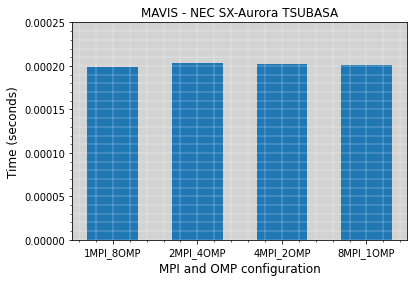

In [127]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.0001)
xpos = [0,1,2,3]
xticks = klist
rects = []
for idx,k in enumerate(klist):
    rect = ax.bar(xpos[idx],height=datamap[k]['Time'],color='#1f77b4',width=0.6)
    rects.append(rect)
plt.xlabel("MPI and OMP configuration",fontsize=12)
plt.ylabel("Time (seconds)",fontsize=12)
# plt.yticks(np.arange(0, 0.00030,0.00001))
plt.ylim([0,0.00025])
# plt.legend(loc='upper left')
plt.minorticks_on()
plt.xticks(xpos,xticks)
plt.grid(which='both', color='white', linewidth='0.3')
plt.title("MAVIS - NEC SX-Aurora TSUBASA")
plt.savefig('plots/bandwidth/Time_MAVIS_1VE_150.pdf'.format("double"),bbox_inches='tight')

In [124]:
tmpflist = []
for x in logflist:
    if x.startswith('NEW1_1VE_4800_19200_300_'):
        tmpflist.append(x)
tmpflist[0][24:33]
datamap_300 = {}
for x in tmpflist:
    k = x[24:33]
    datamap_300[k] = {}
    f= open('log/'+x, 'r')
    while 1:
        line = f.readline()
        if not line:
            break
        if line.startswith('Time'):
            timedata = f.readline().split(' ')
            timedata = [float(x) for x in timedata]
        if line.startswith("BW"):
            bddata = f.readline().split(' ')
            bddata = [float(x) for x in bddata]
    datamap_300[k]['Time'] = np.average(np.array(timedata))
    datamap_300[k]['Bandwidth'] = np.average(np.array(bddata))

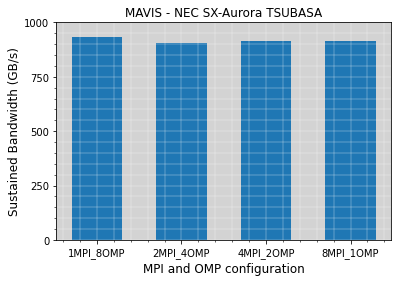

In [122]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.0001)
xpos = [0,1,2,3]
xticks = klist
rects = []
for idx,k in enumerate(klist):
    rect = ax.bar(xpos[idx],height=datamap[k]['Bandwidth'],color='#1f77b4',width=0.6)
    rects.append(rect)
plt.xlabel("MPI and OMP configuration",fontsize=12)
plt.ylabel("Sustained Bandwidth (GB/s)",fontsize=12)
plt.yticks(np.arange(0, 1200, 250))
# plt.legend(loc='upper left')
plt.minorticks_on()
plt.xticks(xpos,xticks)
plt.grid(which='both', color='white', linewidth='0.3')
plt.title("MAVIS - NEC SX-Aurora TSUBASA")
plt.savefig('plots/bandwidth/Bandwidth_MAVIS_1VE_300.pdf'.format("double"),bbox_inches='tight')

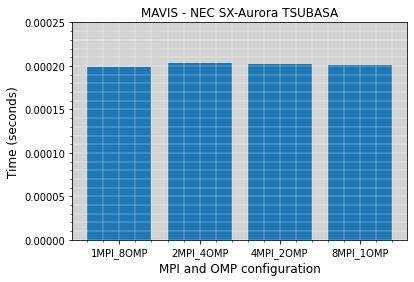

In [123]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.0001)
xpos = [0,1,2,3]
xticks = klist
rects = []
for idx,k in enumerate(klist):
    rect = ax.bar(xpos[idx],height=datamap[k]['Time'],color='#1f77b4')
    rects.append(rect)
plt.xlabel("MPI and OMP configuration",fontsize=12)
plt.ylabel("Time (seconds)",fontsize=12)
# plt.yticks(np.arange(0, 0.00030,0.00001))
plt.ylim([0,0.00025])
# plt.legend(loc='upper left')
plt.minorticks_on()
plt.xticks(xpos,xticks)
plt.grid(which='both', color='white', linewidth='0.3')
plt.title("MAVIS - NEC SX-Aurora TSUBASA")
plt.savefig('plots/bandwidth/Time_MAVIS_1VE_300.pdf'.format("double"),bbox_inches='tight')